In [4]:
import matplotlib as mpl
import FinanceDataReader as fdr

# matplotlib 환경 설정
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000


In [6]:
df=fdr.DataReader('105560','2019-01-01','2019-12-31')
df.head(15)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,46700,46900,45600,45950,636199,-0.011828
2019-01-03,46600,46800,46200,46450,1275976,0.010881
2019-01-04,46500,46600,45600,45650,784105,-0.017223
2019-01-07,45800,46650,45450,45450,957133,-0.004381
2019-01-08,45900,45950,45300,45500,868450,0.001100
2019-01-09,46050,46650,45800,46450,885435,0.020879
2019-01-10,46500,46500,45500,45500,1195029,-0.020452
2019-01-11,45550,46100,45150,45350,1077396,-0.003297
2019-01-14,45450,45850,44400,44550,1189035,-0.017641


여러 종목의 종가(Close) 가져오기

In [7]:

stock_list = [
  ["삼성전자", "005930"],
  ["SK하이닉스", "000660"],
  ["현대차", "005380"],
  ["셀트리온", "068270"],
  ["LG화학", "051910"],
  ["POSCO", "005490"],
  ["삼성물산", "028260"],
  ["NAVER", "035420"],
]

In [8]:

import pandas as pd

df_list = [fdr.DataReader(code, '2019-01-01', '2019-12-31')['Close'] for name, code in stock_list]
len(df_list)

8

In [9]:
df=pd.concat(df_list,axis=1)
df.columns=[name for name, code in stock_list]
df.head(10)

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2019-01-02,38750,60600,114000,201193,337000,237000,104000,118000
2019-01-03,37600,57700,116500,197441,328000,237000,104500,122000
2019-01-04,37450,58300,119500,206352,330500,239000,107000,125500
2019-01-07,38750,58700,120500,202599,343000,246000,108000,131500
2019-01-08,38100,59200,119500,200254,349500,245500,107000,130000
2019-01-09,39600,63600,123000,200724,352000,255500,109000,133000
2019-01-10,39800,65300,123000,203069,347000,258500,108500,131000
2019-01-11,40500,65100,123000,203069,349000,255500,109000,131000
2019-01-14,40050,62100,121500,197910,350500,250000,109500,127000


<AxesSubplot:xlabel='Date'>

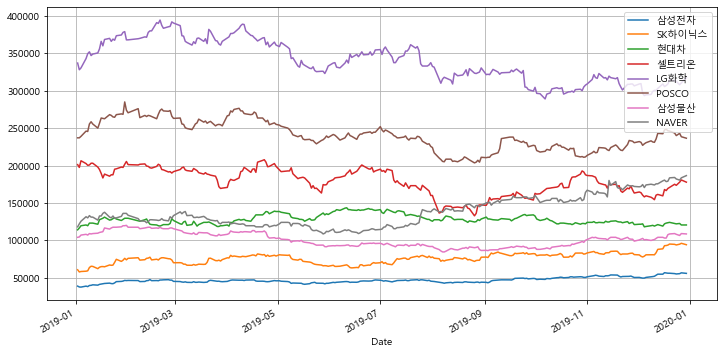

In [10]:
df.plot()

<AxesSubplot:xlabel='Date'>

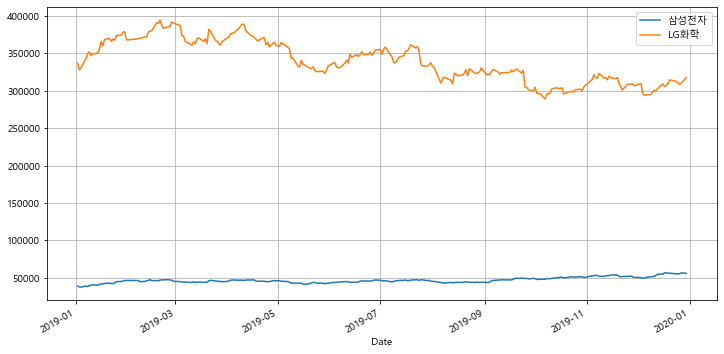

In [11]:
df[['삼성전자','LG화학']].plot()

<AxesSubplot:xlabel='Date'>

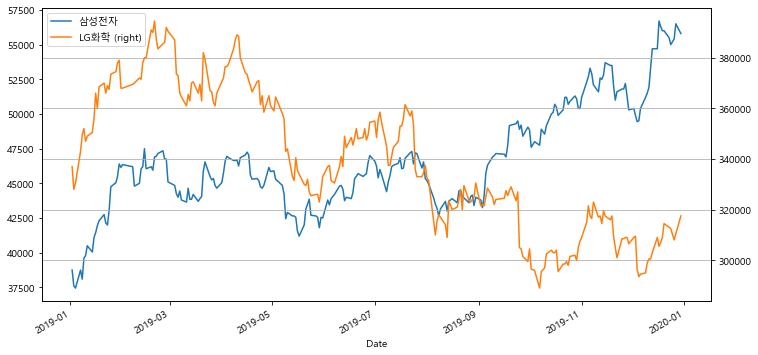

In [12]:
df[['삼성전자','LG화학']].plot(secondary_y='LG화학')

<AxesSubplot:xlabel='Date'>

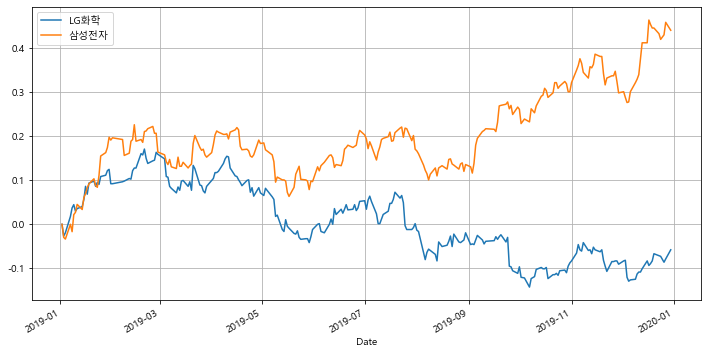

In [13]:
df2=df[['LG화학','삼성전자']]

df_plot=df2/df2.iloc[0]-1
df_plot.plot()

개별 종목의 2019년 수익률 비교

<AxesSubplot:xlabel='Date'>

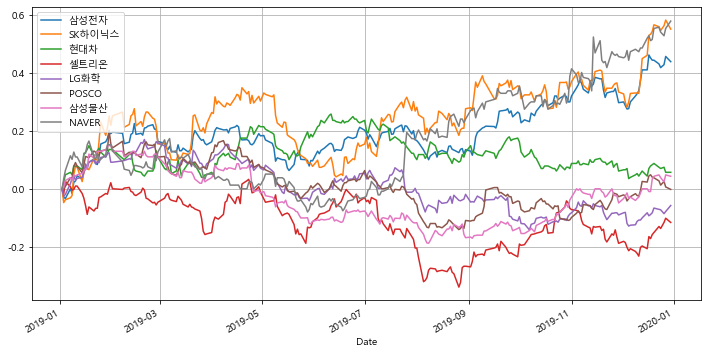

In [14]:
df_norm=df/df.iloc[0]-1
df_norm.plot()

In [15]:
df_norm.iloc[-1].sort_values(ascending=False)

NAVER     0.580508
SK하이닉스    0.552805
삼성전자      0.440000
현대차       0.057018
삼성물산      0.043269
POSCO    -0.002110
LG화학     -0.057864
셀트리온     -0.116550
Name: 2019-12-30 00:00:00, dtype: float64

2019년 가장 좋은 수익률은 NAVER 58.0%, SK하이닉스 55.2% 이며 반대로

LG화학과 셀트리온이 각각 -5.7%, -11.6%를 년 수익률을 기록했습니다.